In [1]:
import duckdb
import pandas as pd
from utils.betting import get_pp_close

In [2]:
pp = get_pp_close()
pp = pp.loc[pp.league_name == 'NFL'].copy(deep=True).reset_index(drop=True)
pp['stat'] = pp['stat'].replace({
        "Receiving Yards in First 2 Receptions":'yards_2_catches',
    "Rush Yards in First 5 Attempts": 'yards_5_rushes'
})

In [3]:
sorted(list(pp['stat'].unique()))

['48+ Yard FG Made (Combo)',
 'AST',
 'Completion Percentage',
 'Completions in First 10 Pass Attempts',
 'Defensive Pass Interference (Combo)',
 'FG',
 'FG Made (Combo)',
 'Fantasy Score',
 'Field Goal Yards (Combo)',
 'Halves with 100+ Pass Yards',
 'Halves with 150+ Pass Yards',
 'Halves with 25+ Receiving Yards',
 'Halves with 25+ Rush Yards',
 'Halves with 50+ Rush Yards',
 'INT',
 'INT (Combo)',
 'Kicking Points',
 'Longest Completion',
 'Longest FG Made Yds (Combo)',
 'Longest Punt (Yards)',
 'Longest Reception',
 'Longest Rush',
 'PAT Made',
 'Pass Attempts',
 'Pass Attempts\t(Combo)',
 'Pass Completions',
 'Pass Completions (Combo)',
 'Pass Deflections',
 'Pass TDs',
 'Pass Yards',
 'Pass Yards (Combo)',
 'Pass+Rush Yds',
 'Pass+Rush+Rec TDs',
 'Passing Yards in First 10 Attempts',
 'Punt Touchbacks (Combo)',
 'Punts',
 'Punts Inside 20',
 'Quarters With 1+ Reception',
 'Quarters With 5+ Rush Yards',
 'Quarters with 1+ Reception',
 'Quarters with 10+ Receiving Yards',
 'Quarte

In [4]:
new_stats = [
    "Halves with 100+ Pass Yards",
    "Halves with 150+ Pass Yards",
    "Halves with 25+ Receiving Yards",
    "Halves with 25+ Rush Yards",
    "Halves with 50+ Rush Yards",
    "Quarters With 1+ Reception",
    "Quarters With 5+ Rush Yards",
    "Quarters with 1+ Reception",
    "Quarters with 10+ Receiving Yards",
    "Quarters with 10+ Rush Yards",
    "Quarters with 20+ Rush Yards",
    "Quarters with 25+ Pass Yards",
    "Quarters with 5+ Rush Yards",
    "Quarters with 50+ Pass Yards",
    "Receiving Yards in First 2 Receptions",
    "Rush Yards in First 5 Attempts",
    "Yards on First Pass Completion",
    "Yards on First Reception",
    "Yards on First Rush Attempt",
]

In [5]:
import duckdb

# connect to in-memory database (or use a file e.g. "mydb.duckdb")
con = duckdb.connect('./data/nfl.duckdb')

# read query from file
with open("./data/queries/pp_new_stats.sql", "r") as f:
    sql = f.read()

# run query
df = con.execute(sql).fetchdf()  # returns pandas DataFrame

In [6]:
df#.sort_values(by='receiving_yards',na_position='last')

,game_id,home_team,away_team,season,week,gsis_id,pbp_name,name,first_catch,yards_2_catches,...,pat_pct,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance,fantasy_points,fantasy_points_ppr,gameday,spread_line
0,2023_01_LA_SEA,SEA,LA,2023,1,00-0026498,M.Stafford,Matthew Stafford,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,14.46,14.46,2023-09-10,4.5
1,2023_01_BUF_NYJ,NYJ,BUF,2023,1,00-0028002,None,Randall Cobb,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2023-09-11,-2.5
2,2023_01_LV_DEN,DEN,LV,2023,1,00-0029263,R.Wilson,Russell Wilson,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,15.18,15.18,2023-09-10,3.0
3,2023_01_DET_KC,KC,DET,2023,1,00-0029293,M.Jones,Marvin Jones,5.0,8.0,...,NaN,0.0,0.0,0.0,0.0,0.0,-1.20,0.80,2023-09-07,4.0
4,2023_01_TEN_NO,NO,TEN,2023,1,00-0029701,R.Tannehill,Ryan Tannehill,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,2.42,2.42,2023-09-10,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11822,2023_15_NYJ_MIA,MIA,NYJ,2023,15,None,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-17,7.5
11823,2023_22_SF_KC,KC,SF,2023,22,None,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-11,-1.5
11824,2023_15_TB_GB,GB,TB,2023,15,None,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-17,4.0
11825,2023_15_SF_ARI,ARI,SF,2023,15,None,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-17,-12.5


In [7]:
df.iloc[0].to_dict()

{'game_id': '2023_01_LA_SEA',
 'home_team': 'SEA',
 'away_team': 'LA',
 'season': 2023,
 'week': 1,
 'gsis_id': '00-0026498',
 'pbp_name': 'M.Stafford',
 'name': 'Matthew Stafford',
 'first_catch': nan,
 'yards_2_catches': nan,
 'first_rush': 9.0,
 'yards_5_rushes': 11.0,
 'qtrs_over_5_rush_yards': 1.0,
 'qtrs_over_5_rec_yards': 0.0,
 'qtrs_with_reception': 0.0,
 'player_id': '00-0026498',
 'player_name': 'M.Stafford',
 'player_display_name': 'Matthew Stafford',
 'position': 'QB',
 'position_group': 'QB',
 'headshot_url': 'https://static.www.nfl.com/image/upload/{formatInstructions}/league/svxl2pk2cuqf26zrhii4',
 'season_1': 2023.0,
 'week_1': 1.0,
 'season_type': 'REG',
 'team': 'LA',
 'opponent_team': 'SEA',
 'completions': 24.0,
 'attempts': 38.0,
 'passing_yards': 334.0,
 'passing_tds': 0.0,
 'passing_interceptions': 0.0,
 'sacks_suffered': 0.0,
 'sack_yards_lost': 0.0,
 'sack_fumbles': 0.0,
 'sack_fumbles_lost': 0.0,
 'passing_air_yards': 409.0,
 'passing_yards_after_catch': 106.0

In [8]:
df['gameday'] = pd.to_datetime(df['gameday'])

In [9]:
comb = pp.merge(df, left_on=['player', 'date'], right_on=['name', 'gameday'])

In [10]:
def calc_outcome(row):
	outcome = 0
	for part in row['stat'].split('+afsda'):
		try:
			outcome += row[part]
		except KeyError:
			return float('nan')
	return outcome

comb['result'] = comb.apply(lambda row: calc_outcome(row), axis=1)
comb['o_u'] = [
	'under' if x > y else 'over' if x < y else 'push' if x == y else 'N/A'
	for x, y in zip(comb['line'], comb['result'])
]
comb = comb.loc[comb.o_u != 'N/A'].reset_index(drop=True)
comb


#comb.loc[comb.stat=='yards_5_rushes]

,player,team_x,line,alt_line,stat,opp,league_id,league_name,event_time,pp_player_id,...,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance,fantasy_points,fantasy_points_ppr,gameday,spread_line,result,o_u
0,Kenneth Walker III,SEA,18.5,standard,yards_5_rushes,SF,9,NFL,2024-10-11 00:00:00+00,214664,...,0.0,0.0,0.0,0.0,12.90,20.90,2024-10-10,-3.5,13.0,under
1,Jordan Mason,SF,20.5,standard,yards_5_rushes,SEA,9,NFL,2024-10-11 00:00:00+00,212506,...,0.0,0.0,0.0,0.0,8.20,9.20,2024-10-10,-3.5,45.0,over
2,Breece Hall,NYJ,19.5,standard,yards_5_rushes,BUF,9,NFL,2024-10-15 00:00:00+00,206316,...,0.0,0.0,0.0,0.0,16.90,21.90,2024-10-14,-1.0,44.0,over
3,Najee Harris,PIT,18.5,standard,yards_5_rushes,NYJ,9,NFL,2024-10-21 00:00:00+00,207090,...,0.0,0.0,0.0,0.0,16.20,16.20,2024-10-20,-3.0,23.0,over
4,Breece Hall,NYJ,19.5,standard,yards_5_rushes,PIT,9,NFL,2024-10-21 00:00:00+00,206316,...,0.0,0.0,0.0,0.0,20.10,26.10,2024-10-20,-3.0,10.0,under
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,Bucky Irving,TB,12.5,standard,yards_2_catches,ATL,9,NFL,2025-09-07 17:00:00+00,212264,...,0.0,0.0,0.0,0.0,10.50,14.50,2025-09-07,-1.5,9.0,under
571,Trey McBride,ARI,17.5,standard,yards_2_catches,NO,9,NFL,2025-09-07 17:00:00+00,211118,...,0.0,0.0,0.0,0.0,6.10,12.10,2025-09-07,-6.0,16.0,under
572,De'Von Achane,MIA,14.5,standard,yards_2_catches,IND,9,NFL,2025-09-07 17:00:00+00,211214,...,0.0,0.0,0.0,0.0,13.50,16.50,2025-09-07,1.5,9.0,under
573,Bijan Robinson,ATL,21.5,standard,yards_5_rushes,TB,9,NFL,2025-09-07 17:00:00+00,206319,...,0.0,0.0,0.0,0.0,18.40,24.40,2025-09-07,-1.5,10.0,under


In [11]:
from utils.betting import pivot_lines
res = pivot_lines(comb, ['alt_line','stat', 'season']).sort_values(by=['stat'])
res

o_u,alt_line,stat,season,over,under,push,over_ratio,count
0,standard,yards_2_catches,2024,83,85,0,0.494382,168
1,standard,yards_2_catches,2025,31,52,0,0.387097,83
2,standard,yards_5_rushes,2023,2,1,0,0.538462,3
3,standard,yards_5_rushes,2024,145,138,0,0.511945,283
4,standard,yards_5_rushes,2025,15,23,0,0.416667,38


KeyError: 'line'

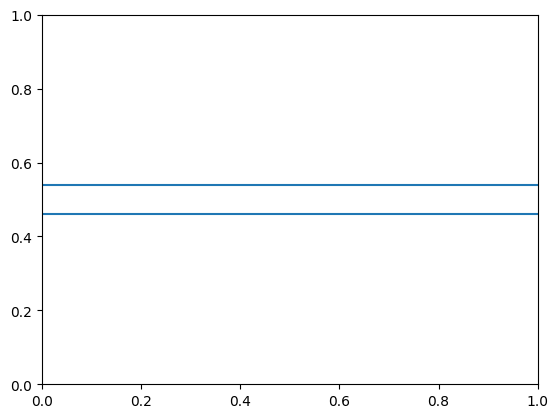

In [12]:
import matplotlib.pyplot as plt

small = res.loc[res.stat=='yards_2_catches']
plt.axhline(0.46)
plt.axhline(0.54)
plt.scatter(small['line'], small['over_ratio'])

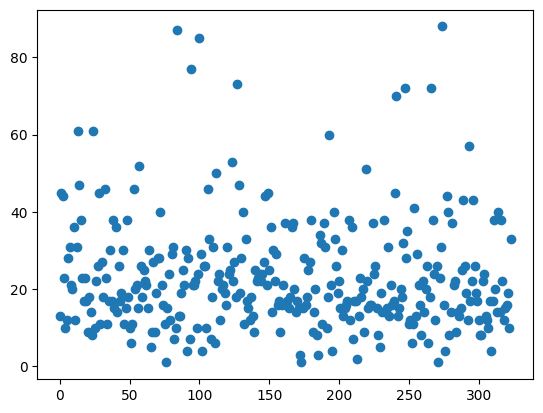

In [ ]:
viz = comb.loc[comb.stat=='yards_5_rushes']['yards_5_rushes']
plt.scatter(range(len(viz)), viz)